## Problem statement :
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

Variables in dataset ▶

● age (numeric)

● job : type of job

● marital : marital status

● educational_qual : education status

● call_type : contact communication type

● day: last contact day of the month (numeric)

● mon: last contact month of year

● dur: last contact duration, in seconds (numeric)

● num_calls: number of contacts performed during this
campaign and for this client

Importing necessary libraries 

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import statistics as stat

#To plot and visualize data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#To split and fit the model and evaluate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

importing the dataset 📁

dataset link -*https://docs.google.com/spreadsheets/d/17MbVyO-sasOk0KswkdgEgOYdVES9JZyaIxOVQ1MZkLs/edit#gid=60269093*

In [ ]:
df=pd.read_csv("/content/Customer Conversion Prediction - Customer Conversion Prediction.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

Well !... we have 45211 rows and 11 columns

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

our column names looks pretty straight forward and in lower case. So, We can proceed with this. No modification is necessary.

Checking for missing values...

In [ ]:
#check for null values in respective columns
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Wow !.. Our data looks pretty much good, since there's no missing values.

Checking for data types of columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


Let's focus on the object/category type datatypes and get to know the counts and uniformity of values. 

In [ ]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in object_cols:
  print("'{}' column has divided into {} categories".format(col,len(df[col].value_counts())))

'job' column has divided into 12 categories
'marital' column has divided into 3 categories
'education_qual' column has divided into 4 categories
'call_type' column has divided into 3 categories
'mon' column has divided into 12 categories
'prev_outcome' column has divided into 4 categories
'y' column has divided into 2 categories


As we get to know the category counts, we'll further investigate what are all those values.

In [ ]:
for col in object_cols:
  print("{} :".format(col))
  print(df[col].value_counts())
  print("**_________________________________________________**")

job :
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
**_________________________________________________**
marital :
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
**_________________________________________________**
education_qual :
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64
**_________________________________________________**
call_type :
cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64
**_________________________________________________**
mon :
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon

We have observed that in the column "JOB" for one category the value has full-stop to it's end. So we don't need and will remove.

Column - JOB

*value "admin." to "admin"*

In [ ]:
df['job']=df['job'].replace({'admin.':'admin'})

We'll confirm whether the change is reflecting.

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Let's drop all the duplicate values.

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

Before we had 45211 rows and after dropping duplicates we got 45205, which is considerably less but still it will mess up the model, if not taken care.


## Visualizing data 📊

We will plot all the categorical columns in a countplot and check the data distribution.

In [ ]:
object_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

Text(0.5, 1.0, 'Customer subscription based on educational qualification')

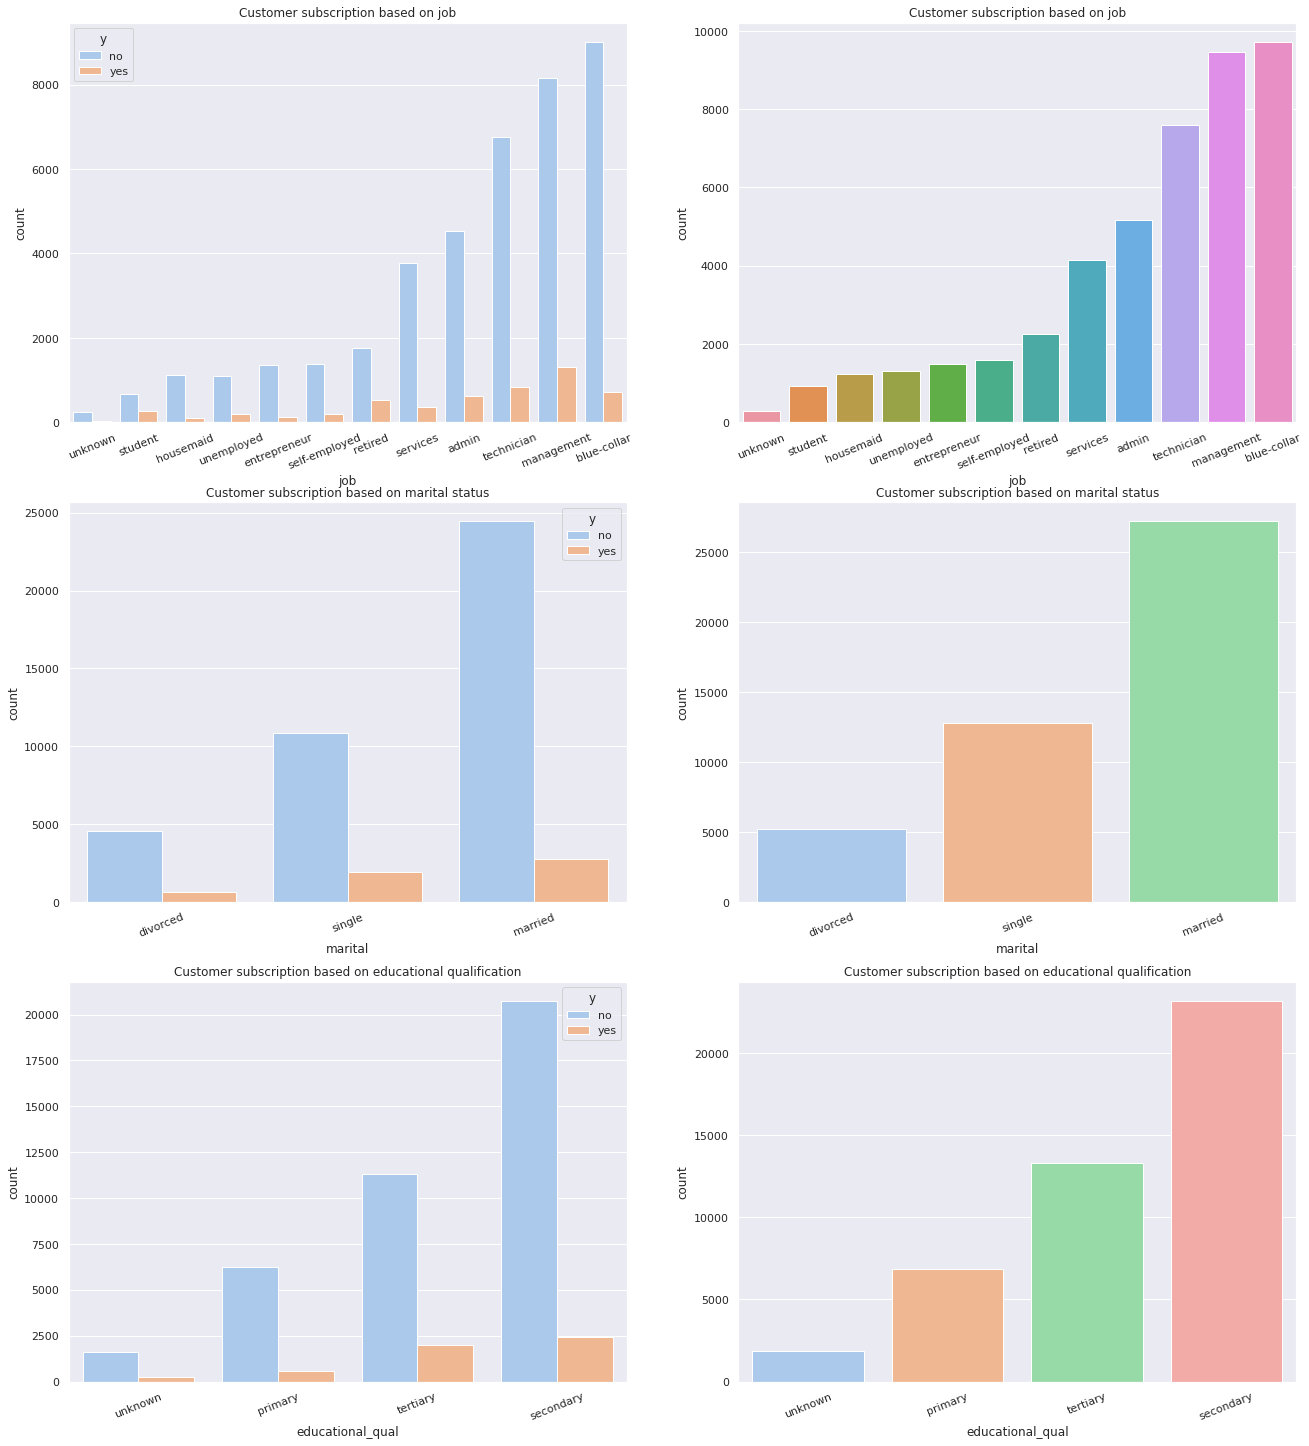

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(22,25))
plt.subplot(321)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1],hue=df['y']) #note when we do apply ".value_counts" to column it will display result in descending order, so we are getting its index and reversing to get ascending sequence of values to be displayed.
plt.xticks(rotation=22)
plt.xlabel('job')
plt.ylabel('count')
plt.title("Customer subscription based on job")

plt.subplot(322)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1]) 
plt.xticks(rotation=22)
plt.xlabel('job')
plt.ylabel('count')
plt.title("Customer subscription based on job")

plt.subplot(323)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1],hue=df['y']) 
plt.xticks(rotation=22)
plt.xlabel('marital')
plt.ylabel('count')
plt.title("Customer subscription based on marital status")

plt.subplot(324)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1]) 
plt.xticks(rotation=22)
plt.xlabel('marital')
plt.ylabel('count')
plt.title("Customer subscription based on marital status")

plt.subplot(325)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1],hue=df['y']) 
plt.xticks(rotation=22)
plt.xlabel('educational_qual')
plt.ylabel('count')
plt.title("Customer subscription based on educational qualification")

plt.subplot(326)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1]) 
plt.xticks(rotation=22)
plt.xlabel('educational_qual')
plt.ylabel('count')
plt.title("Customer subscription based on educational qualification")





Inferences from the above plots: 💡

1. The most number of peoples who has bluecollar jobs contributed to the data, whereas high no of subscriptions came from managemnet category peoples followed by technician.
2. People who were married contributed more towards subscriptions followed by single and divorced.
3. People with secondary education background had more engagements with campaign then rest and also more subscriptions comparitively higher than tertiary.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

Text(0.5, 1.0, 'Customer subscription based on previous campaign outcome')

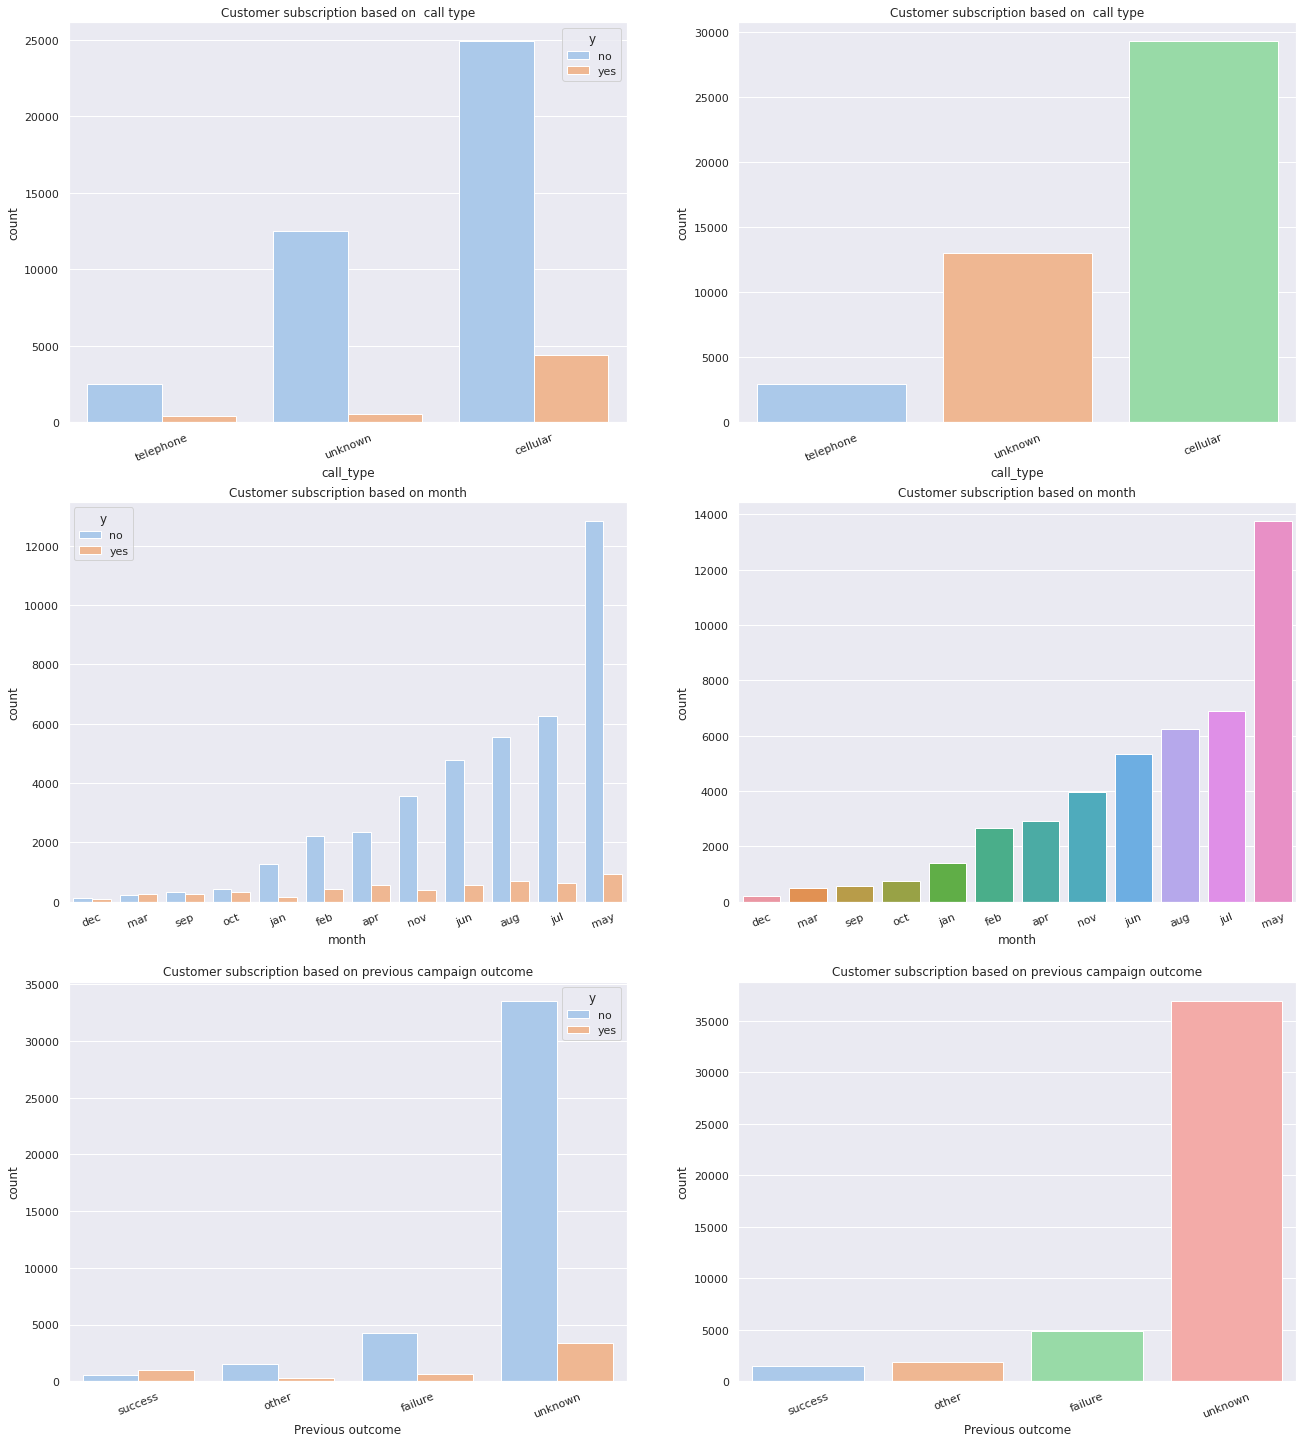

In [ ]:
plt.figure(figsize=(22,25))
plt.subplot(321)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1],hue=df['y']) 
plt.xticks(rotation=22)
plt.xlabel('call_type')
plt.ylabel('count')
plt.title("Customer subscription based on  call type")

plt.subplot(322)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1]) 
plt.xticks(rotation=22)
plt.xlabel('call_type')
plt.ylabel('count')
plt.title("Customer subscription based on  call type")

plt.subplot(323)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1],hue=df['y']) 
plt.xticks(rotation=22)
plt.xlabel('month')
plt.ylabel('count')
plt.title("Customer subscription based on month")

plt.subplot(324)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1]) 
plt.xticks(rotation=22)
plt.xlabel('month')
plt.ylabel('count')
plt.title("Customer subscription based on month")

plt.subplot(325)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1],hue=df['y']) 
plt.xticks(rotation=22)
plt.xlabel('Previous outcome')
plt.ylabel('count')
plt.title("Customer subscription based on previous campaign outcome")

plt.subplot(326)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1]) 
plt.xticks(rotation=22)
plt.xlabel('Previous outcome')
plt.ylabel('count')
plt.title("Customer subscription based on previous campaign outcome")

Inferences from the above plots: 💡

4. cellular mode of communication plays major role in customer subscription.
5. Out of all, May month tops the chart for the number of interactions and subscriptions as well.
6. From the previous outcome column we can see that "unknown" category tops the chart and significantly covers more than 75% of data.



([<matplotlib.patches.Wedge at 0x7fd099e52970>,
 [Text(-0.9660170395616267, 0.6239479780210775, 'unknown'),
  Text(0.7959424404754246, -0.8300455598640507, 'failure'),
  Text(1.0849737202649876, -0.38122437793818076, 'other'),
  Text(1.1436653091101239, -0.12053904238065394, 'success')],
 [Text(-0.5460096310565715, 0.35266624844669586, '82%'),
  Text(0.4498805098339356, -0.46915618601011555, '11%'),
  Text(0.6132460158019495, -0.21547464839984132, '4%'),
  Text(0.6464195225405047, -0.06813076308471744, '3%')])

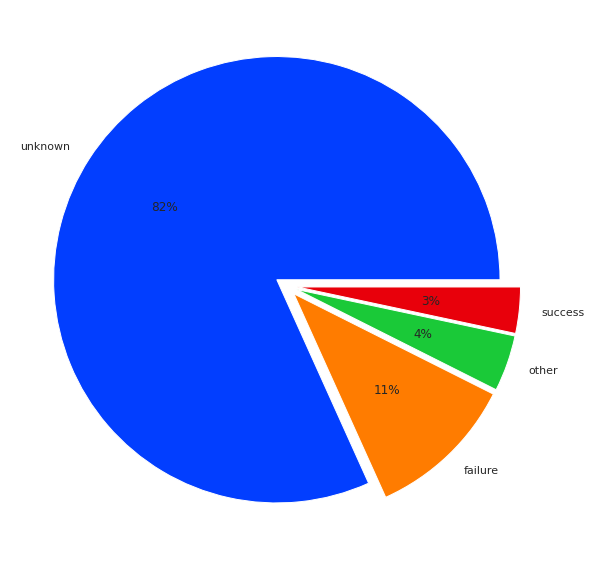

In [ ]:
#checking the propotion of previous_outcome column
plt.figure(figsize=(10,12))
plt.pie(df['prev_outcome'].value_counts(),
        labels=df['prev_outcome'].value_counts().index,
        colors=sns.color_palette('bright'),
        explode = (0.05, 0.05, 0.05, 0.05),
        autopct='%.0f%%')

We can see that 82% of data is unknown for the previous campaign outcome.

<AxesSubplot:xlabel='y', ylabel='num_calls'>

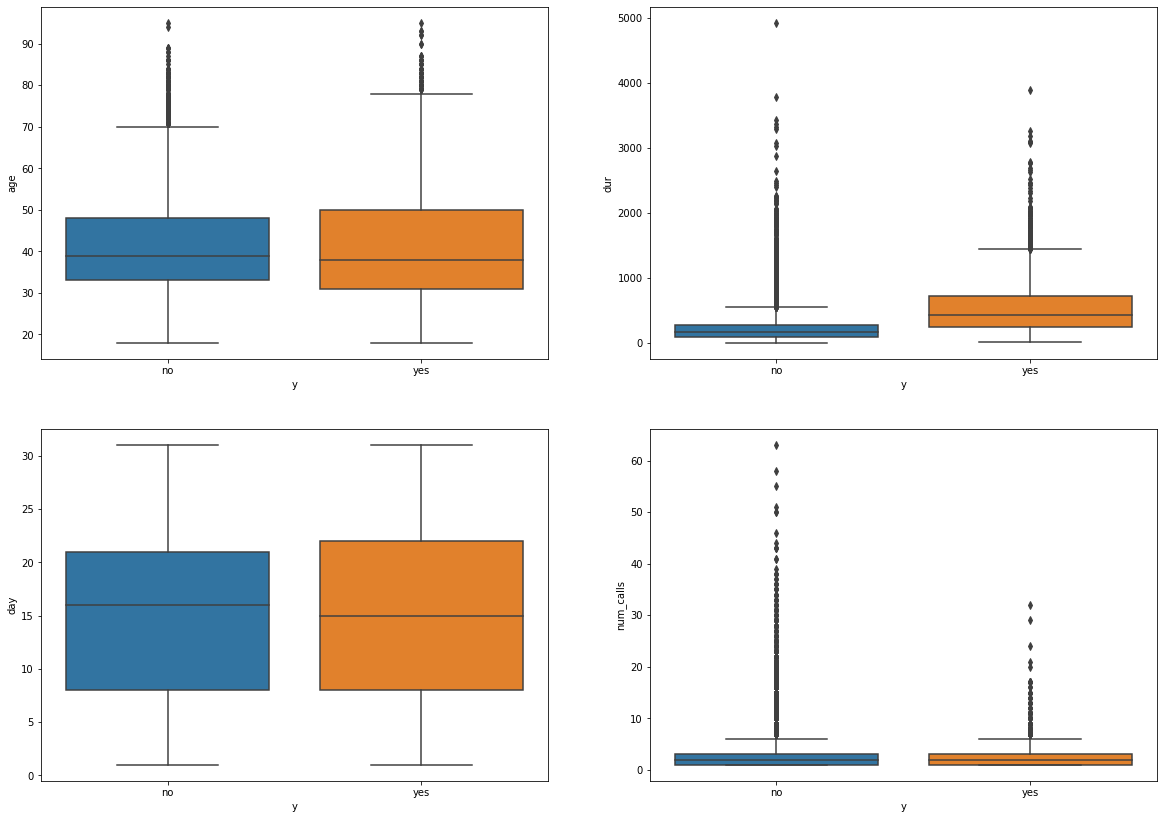

In [ ]:
plt.figure(figsize=(20,22))
plt.subplot(321)
sns.boxplot(x=df['y'],y=df['age'])

plt.subplot(322)
sns.boxplot(x=df['y'],y=df['dur'])

plt.subplot(323)
sns.boxplot(x=df['y'],y=df['day'])

plt.subplot(324)
sns.boxplot(x=df['y'],y=df['num_calls'])

# **Encoding categorical varibales: 🔢**

Note that the count distribution of the JOB category is somewhat linear, so in places where it took jump i have skipped one variable.

In [ ]:
df['job']=df['job'].map({'unknown':0,'student':2,'housemaid':3,'unemployed':4,'entrepreneur':5,'self-employed':6,'retired':7,'services':10,'admin':12,
                         'technician':15,'management':18,'blue-collar':19})

In [ ]:
df['marital']=df['marital'].map({'divorced':0,'single':1,'married':2})

In [ ]:
df['education_qual']=df['education_qual'].map({'unknown':0,'primary':2,'tertiary':4,'secondary':6})

call type is nominal data and has less category, so for this we can go with one-hot encoding. 

In [ ]:
df = pd.get_dummies(df, columns = ['call_type'])

Even though the month column does not follows a linear pattern, still we will go for label encoder since the no of categories are significantly higher. So we'll skip variables accordingly the raise in data.

In [ ]:
df['mon']=df['mon'].map({'dec':0,'mar':1,'sep':2,'oct':3,'jan':5,'feb':7,
                         'apr':8,'nov':10,'jun':12,'aug':13,'jul':14,'may':20})

In [ ]:
df['prev_outcome']=df['prev_outcome'].map({'success':0,'other':1,'failure':5,'unknown':9}) 

In [ ]:
df.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y,call_type_cellular,call_type_telephone,call_type_unknown
0,58,18,2,4,5,20,261,1,9,no,0,0,1
1,44,15,1,6,5,20,151,1,9,no,0,0,1
2,33,5,2,6,5,20,76,1,9,no,0,0,1
3,47,19,2,0,5,20,92,1,9,no,0,0,1
4,33,0,1,0,5,20,198,1,9,no,0,0,1


In [ ]:
df.tail()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y,call_type_cellular,call_type_telephone,call_type_unknown
45206,51,15,2,4,17,10,977,3,9,yes,1,0,0
45207,71,7,0,2,17,10,456,2,9,yes,1,0,0
45208,72,7,2,6,17,10,1127,5,0,yes,1,0,0
45209,57,19,2,6,17,10,508,4,9,no,0,1,0
45210,37,5,2,6,17,10,361,2,1,no,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45205 non-null  int64 
 1   job                  45205 non-null  int64 
 2   marital              45205 non-null  int64 
 3   education_qual       45205 non-null  int64 
 4   day                  45205 non-null  int64 
 5   mon                  45205 non-null  int64 
 6   dur                  45205 non-null  int64 
 7   num_calls            45205 non-null  int64 
 8   prev_outcome         45205 non-null  int64 
 9   y                    45205 non-null  object
 10  call_type_cellular   45205 non-null  uint8 
 11  call_type_telephone  45205 non-null  uint8 
 12  call_type_unknown    45205 non-null  uint8 
dtypes: int64(9), object(1), uint8(3)
memory usage: 3.9+ MB


Our data looks good and clean ✅.

Now we can proceed with splitting of data and fitting the model to predict the outcome.

In [ ]:
x=df.drop('y',axis=1)
y=df['y']

In [ ]:
x

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,call_type_cellular,call_type_telephone,call_type_unknown
0,58,18,2,4,5,20,261,1,9,0,0,1
1,44,15,1,6,5,20,151,1,9,0,0,1
2,33,5,2,6,5,20,76,1,9,0,0,1
3,47,19,2,0,5,20,92,1,9,0,0,1
4,33,0,1,0,5,20,198,1,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,15,2,4,17,10,977,3,9,1,0,0
45207,71,7,0,2,17,10,456,2,9,1,0,0
45208,72,7,2,6,17,10,1127,5,0,1,0,0
45209,57,19,2,6,17,10,508,4,9,0,1,0


In [ ]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45205, dtype: object

In [ ]:
#splitting the dataset for train and test in the ratio  of 7:3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4000)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36164, 12) (9041, 12) (36164,) (9041,)


#**Building a ML classification model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

## 1) Logistic regression model

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_predict_test=lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cross_val_log_model=cross_val_score(lr,x_train,y_train,cv=10).mean()
cross_val_log_model

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.8944531003422872

In [ ]:
print(classification_report(y_test,lr_predict_test))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7963
         yes       0.59      0.24      0.34      1078

    accuracy                           0.89      9041
   macro avg       0.75      0.61      0.64      9041
weighted avg       0.87      0.89      0.87      9041



In [ ]:
cm1=confusion_matrix(y_test,lr_predict_test)
cm1

array([[7781,  182],
       [ 818,  260]])

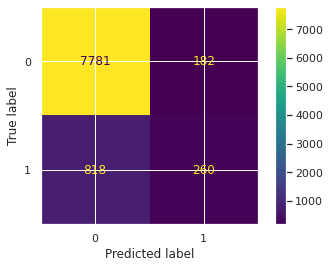

In [ ]:
ConfusionMatrixDisplay(cm1).plot()

## 2) KNN classifier

Choosing best K value for the model.

In [ ]:
#it is better to scale our training data with standard scaling for KNN
scaled_xtrain=x_train.copy()
scaled_xtest=x_test.copy()
scaler = StandardScaler()
for col in x_train.columns:
  scaler.fit(x_train[[col]])
  scaled_xtrain[col]=scaler.transform(x_train[[col]])
  scaled_xtest[col]=scaler.transform(x_test[[col]])

In [ ]:
scaled_xtrain.head(5)

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,call_type_cellular,call_type_telephone,call_type_unknown
33905,-1.218037,0.818934,-0.700263,-0.316610,1.708279,-1.058678,-0.072981,-0.568697,0.435550,0.736593,-0.261035,-0.635903
31746,0.948857,1.005885,0.740911,0.835869,-1.056659,-1.058678,2.487088,-0.568697,0.435550,0.736593,-0.261035,-0.635903
244,0.760431,0.818934,0.740911,-0.316610,-1.297088,1.253502,-0.100298,0.077069,0.435550,-1.357601,-0.261035,1.572567
32506,1.231495,1.005885,0.740911,-1.469089,0.145488,-1.058678,0.340689,-0.568697,0.435550,0.736593,-0.261035,-0.635903
29519,0.666219,-0.302775,0.740911,-1.469089,-1.537517,-1.251360,-0.736413,-0.568697,-1.207855,0.736593,-0.261035,-0.635903


In [ ]:
scaled_xtest.head(5)

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,call_type_cellular,call_type_telephone,call_type_unknown
5427,-0.181696,-0.302775,-2.141436,0.835869,0.866776,1.253502,2.159274,-0.568697,0.43555,-1.357601,-0.261035,1.572567
8839,0.195155,-2.546193,-0.700263,-1.469089,-1.417303,-0.287952,-0.830074,-0.568697,0.43555,-1.357601,-0.261035,1.572567
13737,-1.218037,1.005885,-0.700263,0.835869,-0.696015,0.097412,-0.888612,-0.245814,0.43555,-1.357601,3.830897,-0.635903
38390,-1.123824,-0.302775,-0.700263,0.835869,-0.094941,1.253502,-0.677875,-0.568697,-2.85126,0.736593,-0.261035,-0.635903
18788,-0.558548,0.258079,0.740911,0.835869,1.828494,0.097412,-0.783244,10.086440,0.43555,0.736593,-0.261035,-0.635903


In [ ]:
best_k=np.arange(1,20)
cross_val_knn=[]
for k in best_k:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(scaled_xtrain,y_train)
  cv_score=cross_val_score(knn,scaled_xtrain,y_train,cv=10).mean()
  cross_val_knn.append(cv_score)
  print("K value : {},model score : {}, cross validation score :{} ".format(k,knn.score(scaled_xtrain,y_train),cv_score))


K value : 1,model score : 1.0, cross validation score :0.8761752057026676 
K value : 2,model score : 0.9320871585001659, cross validation score :0.8886185808901427 
K value : 3,model score : 0.9365114478486893, cross validation score :0.8883697788344616 
K value : 4,model score : 0.9192843711978763, cross validation score :0.8920197702099963 
K value : 5,model score : 0.9206946134277182, cross validation score :0.8927111189540053 
K value : 6,model score : 0.9129797588762305, cross validation score :0.8932642851113595 
K value : 7,model score : 0.9150259926999226, cross validation score :0.8940385449365215 
K value : 8,model score : 0.9088872912288464, cross validation score :0.8940107600906242 
K value : 9,model score : 0.9095232828226966, cross validation score :0.8952274442712754 
K value : 10,model score : 0.9066474947461564, cross validation score :0.8952274136880659 
K value : 11,model score : 0.9080024333591417, cross validation score :0.8965824333714195 
K value : 12,model scor

Usually we can select K with max value of cross validation score but we will also take the model score into consideration and K=7 seems optimal trade-off between model and cross validation scores.

K value : 7 model score : 0.9150259926999226 cross validation score :0.8940385449365215 

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(scaled_xtrain,y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_predict_test=knn_model.predict(scaled_xtest)
cross_val_knn_model=cross_val_score(knn_model,scaled_xtrain,y_train,cv=10).mean()
cross_val_knn_model

0.8940385449365215

In [ ]:
print(classification_report(y_test,knn_predict_test))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7963
         yes       0.58      0.31      0.40      1078

    accuracy                           0.89      9041
   macro avg       0.75      0.64      0.67      9041
weighted avg       0.87      0.89      0.88      9041



In [ ]:
cm2=confusion_matrix(y_test,knn_predict_test)
cm2

array([[7724,  239],
       [ 749,  329]])

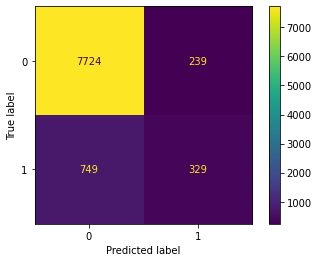

In [ ]:
ConfusionMatrixDisplay(cm2).plot()

## 3) Decision Tree classifier

In [ ]:
max_depth=np.arange(1,20)
cross_vals_dtc=[]
for depth in max_depth:
  dtc=DecisionTreeClassifier(max_depth=depth,random_state=0)
  dtc.fit(x_train,y_train)
  cv_score=cross_val_score(dtc,x_train,y_train,cv=15).mean()
  cross_vals_dtc.append(cv_score)
  print("max depth: {}, DTC model score: {}, Cross val score: {}".format(depth,dtc.score(x_train,y_train),cv_score))


max depth: 1, DTC model score: 0.88355823470855, Cross val score: 0.8835582418754979
max depth: 2, DTC model score: 0.8972458798805442, Cross val score: 0.8971629340625866
max depth: 3, DTC model score: 0.902527375290344, Cross val score: 0.9014213669138623
max depth: 4, DTC model score: 0.9050436898573166, Cross val score: 0.9026103732718815
max depth: 5, DTC model score: 0.9057626368764518, Cross val score: 0.9018914805527684
max depth: 6, DTC model score: 0.9086107731445636, Cross val score: 0.901117239852153
max depth: 7, DTC model score: 0.9116801238801018, Cross val score: 0.9007301596589629
max depth: 8, DTC model score: 0.9149983408914943, Cross val score: 0.8999282334941339
max depth: 9, DTC model score: 0.9195332374737308, Cross val score: 0.8993198531626311
max depth: 10, DTC model score: 0.925671938944807, Cross val score: 0.8986286344342693
max depth: 11, DTC model score: 0.932612542860303, Cross val score: 0.896720574728667
max depth: 12, DTC model score: 0.93894480699037

Also here we can see after few values the cross validation score decreases with the increase in depth of tree.
Here we will do a trade-off between model score and cross validation score and choose **max depth = 6** with values *DTC model score: 0.9086107731445636, Cross val score: 0.901117239852153*

In [ ]:
dtc_model=DecisionTreeClassifier(max_depth=6,random_state=0)
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [ ]:
dtc_predict_test=dtc_model.predict(x_test)
cross_val_dtc_model=cross_val_score(dtc_model,x_train,y_train,cv=15).mean()
cross_val_dtc_model

0.901117239852153

In [ ]:
print(classification_report(y_test,dtc_predict_test))

              precision    recall  f1-score   support

          no       0.93      0.96      0.94      7963
         yes       0.60      0.43      0.50      1078

    accuracy                           0.90      9041
   macro avg       0.76      0.70      0.72      9041
weighted avg       0.89      0.90      0.89      9041



In [ ]:
cm3=confusion_matrix(y_test,dtc_predict_test)
cm3

array([[7658,  305],
       [ 613,  465]])

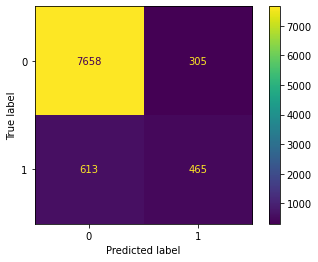

In [ ]:
ConfusionMatrixDisplay(cm3).plot()

In [ ]:
#now we will visualize our decision tree
import graphviz as gp
from sklearn import tree

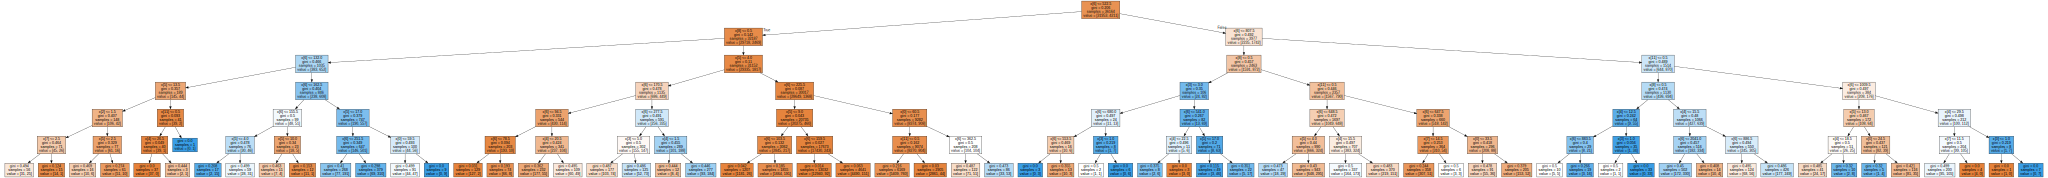

<Figure size 1440x1800 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,25))
data=tree.export_graphviz(dtc_model,filled=True)
gp.Source(data, format="png") 

## 4) Random forest classifier

To choose the best value of no of estimators and max depth for the model.

In [ ]:
best_depth=np.arange(1,20)
cross_vals_rf=[]
for depth in best_depth:
    rf=RandomForestClassifier(max_depth=depth,random_state=0)
    rf.fit(x_train,y_train)
    cv_score=cross_val_score(rf,x_train,y_train,cv=15).mean()
    cross_vals_rf.append(cv_score)
    print("Max depth: {}, model score: {}, cross validation score: {}".format(depth,rf.score(x_train,y_train),cv_score))


Max depth: 1, model score: 0.88355823470855, cross validation score: 0.8835582418754979
Max depth: 2, model score: 0.8840559672602588, cross validation score: 0.8840006815236531
Max depth: 3, model score: 0.8907477048999004, cross validation score: 0.8903330229761816
Max depth: 4, model score: 0.8925727242561664, cross validation score: 0.8923516065428565
Max depth: 5, model score: 0.8968587545625484, cross validation score: 0.8957526505131793
Max depth: 6, model score: 0.9006747041256499, cross validation score: 0.8976606757983951
Max depth: 7, model score: 0.9093297201636987, cross validation score: 0.9008682313027028
Max depth: 8, model score: 0.9155237252516315, cross validation score: 0.9033570088225189
Max depth: 9, model score: 0.9226855436345537, cross validation score: 0.9054860933033417
Max depth: 10, model score: 0.9282988607454927, cross validation score: 0.9049330265329549
Max depth: 11, model score: 0.9351841610441323, cross validation score: 0.9049054902237498
Max depth:

In this case we can see that the maximum cross validation score falls on max depth = 12 and the model score also considerably good. Hence we will go with this.

In [ ]:
rf_model=RandomForestClassifier(max_depth=12,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, random_state=0)

In [ ]:
rf_predict_test=rf_model.predict(x_test)
cross_val_rf_model=cross_val_score(rf_model,x_train,y_train,cv=15).mean()
cross_val_rf_model

0.9067581331070769

In [ ]:
print(classification_report(y_test,rf_predict_test))

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7963
         yes       0.66      0.39      0.49      1078

    accuracy                           0.90      9041
   macro avg       0.79      0.68      0.72      9041
weighted avg       0.89      0.90      0.89      9041



In [ ]:
cm4=confusion_matrix(y_test,rf_predict_test)
cm4

array([[7740,  223],
       [ 654,  424]])

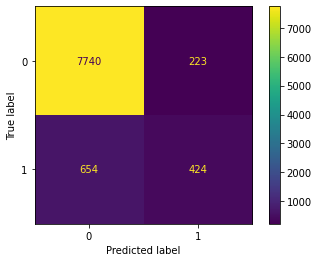

In [ ]:
ConfusionMatrixDisplay(cm4).plot()

## 5) Extreme Gradient Boosting Classifier

Before feeding dependant varible (target feature) into XGB model, we need to encode it to integer format.

In [ ]:
encoded_ytrain=y_train.map({'yes':1,'no':0})
encoded_ytest=y_test.map({'yes':1,'no':0})

In [ ]:
cross_vals_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb=XGBClassifier(learning_rate=lr,max_depth=5,n_estimators=1000,colsample_bytree=0.8)
  xgb.fit(x_train,encoded_ytrain)
  cv_score=cross_val_score(xgb,x_train,encoded_ytrain,cv=15).mean()
  cross_vals_xgb.append(cv_score)
  print('Learning rate: {}, model score: {}, cross validation score: {}'.format(lr,xgb.score(x_train,encoded_ytrain),cv_score))

Learning rate: 0.01, model score: 0.9197268001327287, cross validation score: 0.9085555312700605
Learning rate: 0.05, model score: 0.9436179626147551, cross validation score: 0.9077257934329345
Learning rate: 0.08, model score: 0.9536279172657892, cross validation score: 0.9071175507829777
Learning rate: 0.09, model score: 0.9571120451277514, cross validation score: 0.9068688290700816
Learning rate: 0.1, model score: 0.9593794934188696, cross validation score: 0.9065368788626127
Learning rate: 0.11, model score: 0.9624488441544077, cross validation score: 0.9056520339866895
Learning rate: 0.12, model score: 0.9633613538325406, cross validation score: 0.9060944392144579
Learning rate: 0.13, model score: 0.9676750359473509, cross validation score: 0.9050991048978487
Learning rate: 0.15, model score: 0.9711591638093131, cross validation score: 0.9057903465731351
Learning rate: 0.18, model score: 0.976551266452826, cross validation score: 0.9052372339088994
Learning rate: 0.2, model score:

The maximum cv score occurs at learning rate of 0.01, so we will go with this.

In [ ]:
xgb_model=XGBClassifier(learning_rate=0.01,max_depth=6,n_estimators=1000,colsample_bytree=0.8)
xgb_model.fit(x_train,encoded_ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_predict_test=xgb_model.predict(x_test)
cross_val_xgb_model=cross_val_score(xgb_model,x_train,encoded_ytrain,cv=15).mean()
cross_val_xgb_model

0.9085555312700605

In [ ]:
print(classification_report(encoded_ytest,xgb_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7963
           1       0.65      0.42      0.51      1078

    accuracy                           0.90      9041
   macro avg       0.79      0.69      0.73      9041
weighted avg       0.89      0.90      0.89      9041



In [ ]:
cm5=confusion_matrix(encoded_ytest,xgb_predict_test)
cm5

array([[7715,  248],
       [ 625,  453]])

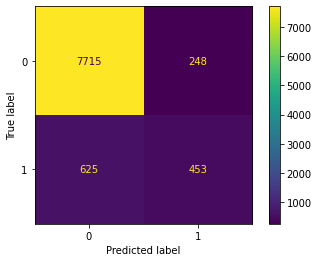

In [ ]:
ConfusionMatrixDisplay(cm5).plot()

# **Cross validation scores for Machine learning models**

In [ ]:
print('Cross validation score for Logistic regression model:',cross_val_log_model)
print('Cross validation score for KNN model',cross_val_knn_model)
print('Cross validation score for Decision Tree classifier', cross_val_dtc_model)
print('Cross validation score for Random forst classifier', cross_val_rf_model)
print('Cross validation score for extreme gradient boosting classifier',cross_val_xgb_model)

Cross validation score for Logistic regression model: 0.8944531003422872
Cross validation score for KNN model 0.8940385449365215
Cross validation score for Decision Tree classifier 0.901117239852153
Cross validation score for Random forst classifier 0.9067581331070769
Cross validation score for extreme gradient boosting classifier 0.9085555312700605


In [ ]:
from sklearn import metrics

In [ ]:
print('Accuracy of Logistic regression model:',metrics.accuracy_score(y_test,lr_predict_test))
print('Accuracy of KNN classifier model:',metrics.accuracy_score(y_test,knn_predict_test))
print('Accuracy of Decision Tress classifier model:',metrics.accuracy_score(y_test,dtc_predict_test))
print('Accuracy of Random forest model:',metrics.accuracy_score(y_test,rf_predict_test))
print('Accuracy of XGB classifier:',metrics.accuracy_score(encoded_ytest,xgb_predict_test))

Accuracy of Logistic regression model: 0.8893927662869152
Accuracy of KNN classifier model: 0.8907200530914722
Accuracy of Decision Tress classifier model: 0.8984625594513881
Accuracy of Random forest model: 0.9029974560336246
Accuracy of XGB classifier: 0.9034398849684769


It's totally evident that our **XGB model** outperforms all other classifier models in terms of cross validation score as well as the accuracy. 

Accuracy of XGB classifier: *0.9034398849684769*
Cross validation score for extreme gradient boosting classifier *0.9085555312700605*


In [ ]:
xgb_model.feature_importances_

array([0.03982682, 0.02665382, 0.02506779, 0.01869164, 0.03893427,
       0.10589977, 0.21714468, 0.02951846, 0.25273114, 0.06611197,
       0.02285596, 0.15656368], dtype=float32)

In [ ]:
x_train.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'call_type_cellular',
       'call_type_telephone', 'call_type_unknown'],
      dtype='object')

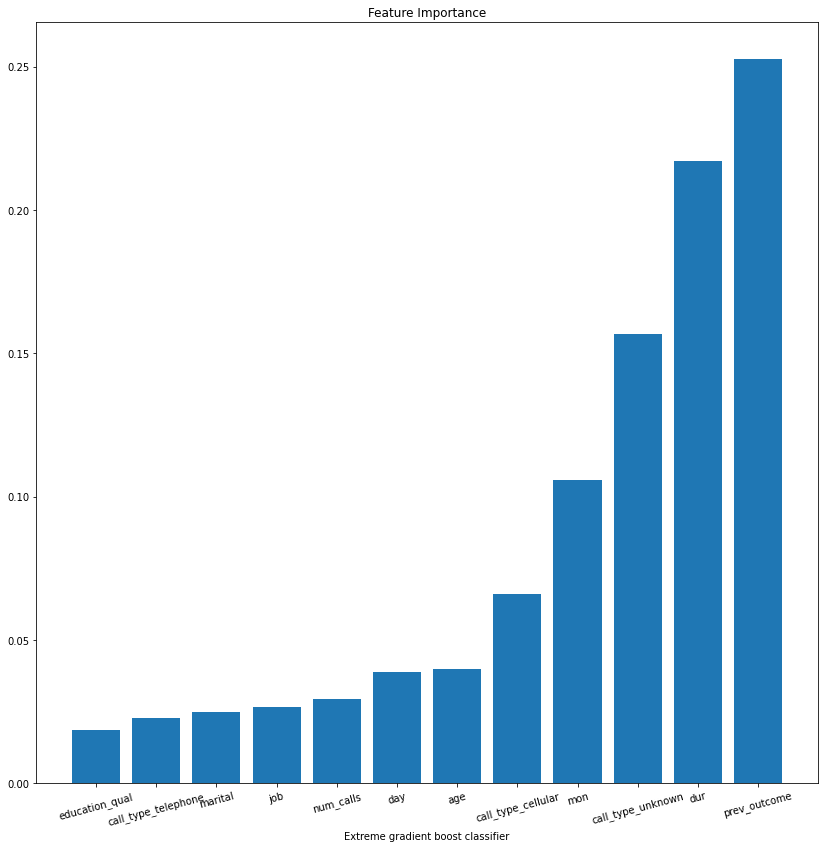

In [ ]:
sorted_col=xgb_model.feature_importances_.argsort()
plt.figure(figsize=(14,14))
plt.bar(x_train.columns[sorted_col],xgb_model.feature_importances_[sorted_col])
plt.xticks(rotation=15)
plt.xlabel("Extreme gradient boost classifier")
plt.title("Feature Importance")
plt.show()

## Suggestions based on outcome from above Machine learning model.

According to the best performed model Extreme gradient boosting classifier the marketing team can focus on the features in the following orders in order to push the campaign towards more interactions with customers.

1) **Prev_outcome** --> We can focus on pushing new campaigns to *"success"* category people's. because it plays a major role in conversion.

2) **dur** --> The *duration of calls above 500* is really a major factor and should prioritise that.

3) **mon** --> The month in which customer subscriptions was huge success were *'May', 'Aug' , 'jun', 'Jul'*. so reaching out to them in this months will essentially turns out to be almost success.

4) **call_type_cellular** --> Reaching out to customers through mobile/cellular type is indeed more successful and evident from above graphs.

5) **age**

6) **day**

7) **num_calls**

8) **job**

9) **marital**

10) **call_type_telephone**

11) **educational_qual**
